# **We start by importing the right modules and building the tree object:**

In [ ]:
from sklearn import tree
import matplotlib
clf = tree.DecisionTreeClassifier()


# **For the example, we can define a minimalist dataset (two points, each in a class):**

In [ ]:
X = [[0, 0], [1, 1]]
Y = [0, 1]

# **The tree is built as usual using the method:.fit(X, y)**

In [ ]:
clf = clf.fit(X, Y)

# **Prediction on new samples is usually done with:.predict(X)**

In [7]:
clf.predict([[2., 2.]])

array([1])

# **We can also predict the probability of each class for a sample (which is calculated as the fraction of training data in each sheet):**

In [8]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

# **Classification of Iris data**
    As the Iris dataset is very common, scikit-learn offers a native function to load it into memory:**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree,model_selection
import scipy
import numpy as np
from matplotlib import pyplot as mtp
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()
X, y = iris.data, iris.target

# Calculate the statistics (mean and standard deviation) for the four explanatory variables: sepal length, sepal width, petal length, and petal width.

# How many examples are there from each class?

In [7]:
scipy.stats.describe(iris.data[:,:5])
np.bincount(iris.target)

array([50, 50, 50])

# **Before building the model, let's separate the dataset into two: 70% for training, 30% for testing.**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# **We can now build a decision tree on top of this data:** 

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# **Once the training is complete, we can visualize the tree, either with matplotlib through the method, or with the tool (command). For example, with matplotlib:plot_treegraphvizdot**

[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

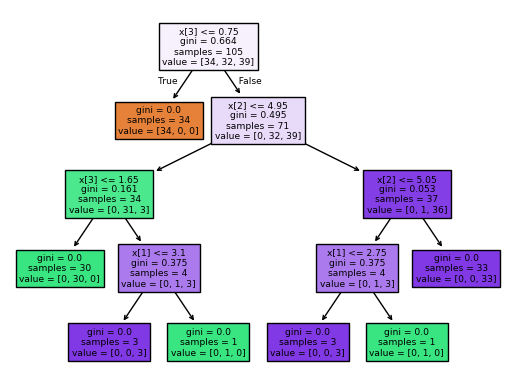

In [13]:
tree.plot_tree(clf, filled=True)

# **Alternatively, it is possible to export by producing a file which is the default format of graphviz:.dot**

In [14]:
# On exporte le graphe dans le fichier iris.dot
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, filled=True)

# **Then, on the command line, it is possible to convert this file into many formats, for example to PDF (shell command):**
# %%bash
# dot -Tpdf iris.dot -o iris.pdf

# **Once the model is built, it can be used for prediction on new data:**

In [16]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

# **We can calculate the test score in this way:**

In [17]:
clf.score(X_test, y_test)

0.9777777777777777

# **Change the parameter values and . What do you see?max_depthmin_samples_leaf**
# Answer: 
# See the decision tree documentation. The parameter is a threshold on the maximum depth of the tree. The parameter gives the minimum number of samples in a leaf node. They make it possible to put constraints on the construction of the tree and therefore to indirectly control the phenomenon of overfitting.max_depthmin_samples_leaf

# Example of use:

In [18]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
#or
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)

# **Quetion**
# The problem here being particularly simple, redo a training/test division with 5% of the data in training and 95% test.
# Calculate the rate of misclassified items on the test set.
# Vary (or better, perform a grid search with ) the values of the parameters and to measure their impact on this score.GridSearchCVmax_depthmin_samples_leaf

# **Answer**
# In general, we use an 80/20 or 70/30 type learning/test division, but since here the learning problem is particularly simple, we take only 5% of the base as a training sample (otherwise, # we risk not seeing anything when we change the parameters).

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,test_size=0.95, random_state=0)

for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

for msplit in [2, 3, 5, 10, 15, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.6573426573426573
0.7062937062937062
0.7972027972027972
0.7972027972027972
0.8111888111888111
0.7062937062937062
0.8881118881118881
0.951048951048951
0.7552447552447552
0.6573426573426573
0.32167832167832167
0.32167832167832167
0.32167832167832167


# **To look for good values for the parameters, we can use cross-validation with:GridSearchCV**

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
    test_size=0.30, random_state=0)
from sklearn.model_selection import GridSearchCV
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.9777777777777777

# **Viewing the decision surface**

# For a pair of attributes, i.e. for two-dimensional observations, we can visualize the decision surface in 2 dimensions. First, we discretize the two-dimensional domain with a constant step and then we evaluate the model at each point of the grid.
# In this example, we only keep the length and width of the petals.

In [24]:
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = mtp.contourf(xx, yy, Z, cmap=mtp.cm.Paired)
mtp.xlabel(iris.feature_names[pair[0]])
mtp.ylabel(iris.feature_names[pair[1]])
mtp.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    mtp.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=mtp.cm.Paired)
mtp.axis("tight")
mtp.suptitle("Decision surface of a decision tree using paired features")
mtp.legend()
mtp.show()

AttributeError: module 'matplotlib' has no attribute 'contourf'

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target



[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, '

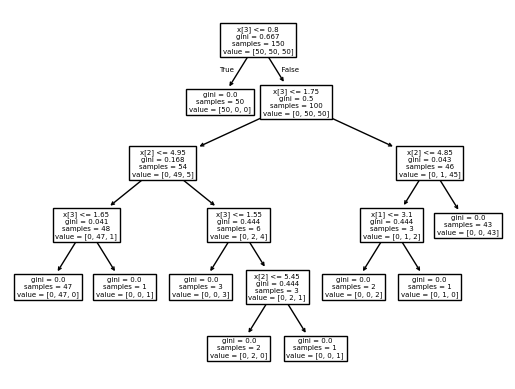

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)